In [1]:
import os
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

# Dataset path
dataset_path = Path("C://Users//Shaurya//Downloads//Vehicles")

# Supported image formats
valid_extensions = (".jpeg", ".jpg", ".png", ".bmp", ".gif")

# Function to load valid images and labels, skipping unsupported files
def load_data(directory, target_size=(224, 224)):
    images = []
    labels = []
    class_names = sorted([d.name for d in os.scandir(directory) if d.is_dir()])  # Get class names
    class_counts = {class_name: 0 for class_name in class_names}  # Initialize class counts
    
    for class_idx, class_name in enumerate(class_names):
        class_dir = directory / class_name
        for img_file in os.listdir(class_dir):
            img_path = class_dir / img_file
            try:
                if img_path.suffix.lower() in valid_extensions:  # Check for valid formats
                    img = load_img(img_path, target_size=target_size)  # Load and resize
                    img_array = img_to_array(img) / 255.0  # Normalize
                    images.append(img_array)
                    labels.append(class_idx)
                    class_counts[class_name] += 1
                else:
                    print(f"Skipping unsupported file: {img_path}")
            except Exception as e:
                print(f"Error loading {img_path}: {e}")
    
    return np.array(images), np.array(labels), class_names, class_counts

# Load the dataset
images, labels, class_names, class_counts = load_data(dataset_path)

# Verify data
print(f"Loaded {images.shape[0]} valid images.")
print(f"Classes: {class_names}")
print(f"Class counts: {class_counts}")


C:\Users\Shaurya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Loaded 6388 valid images.
Classes: ['Auto Rickshaws', 'Bikes', 'Cars', 'Motorcycles', 'Non-vehicles', 'Planes', 'Ships', 'Trains']
Class counts: {'Auto Rickshaws': 800, 'Bikes': 800, 'Cars': 790, 'Motorcycles': 800, 'Non-vehicles': 800, 'Planes': 798, 'Ships': 800, 'Trains': 800}


In [2]:
import matplotlib.pyplot as plt

def plot_sample_images(directory, class_names, target_size=(224, 224)):
    plt.figure(figsize=(12, 8))
    for i, class_name in enumerate(class_names):
        class_dir = directory / class_name
        img_file = os.listdir(class_dir)[0]  # Get the first image from each class
        img_path = class_dir / img_file
        try:
            img = load_img(img_path, target_size=target_size)  # Load image
            img_array = img_to_array(img) / 255.0
            plt.subplot(2, 4, i + 1)  # Adjust rows/cols based on number of classes
            plt.imshow(img_array)
            plt.title(class_name, fontsize=10)
            plt.axis('off')
        except Exception as e:
            print(f"Error displaying image from {class_dir}: {e}")
    plt.tight_layout()
    plt.show()

# Plot example images
plot_sample_images(dataset_path, class_names)


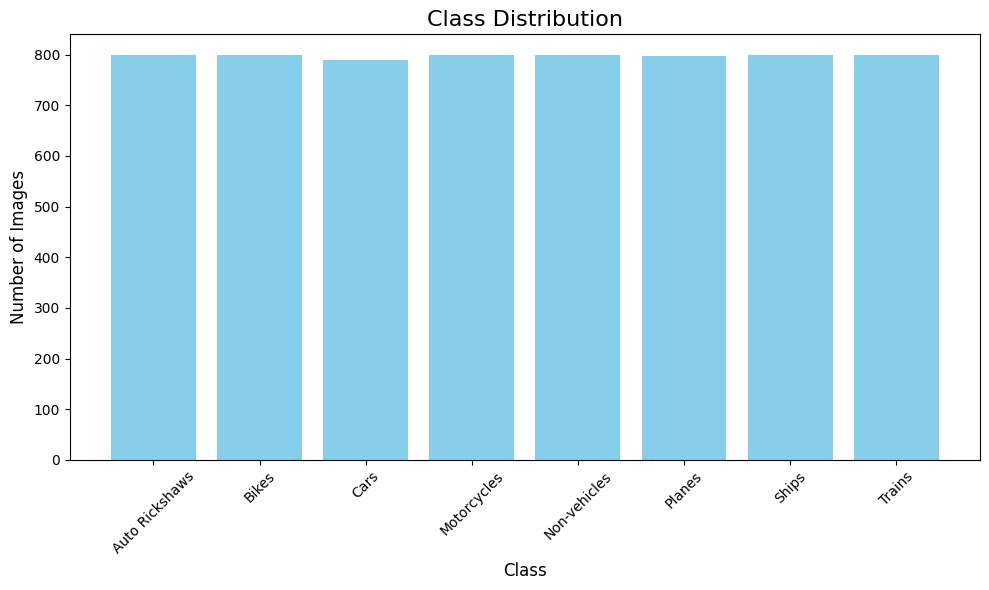

In [3]:
def plot_class_distribution(class_counts):
    """
    Plots the number of images per class as a bar chart.
    """
    plt.figure(figsize=(10, 6))
    plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
    plt.title("Class Distribution", fontsize=16)
    plt.xlabel("Class", fontsize=12)
    plt.ylabel("Number of Images", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()

# Plot class distribution
plot_class_distribution(class_counts)


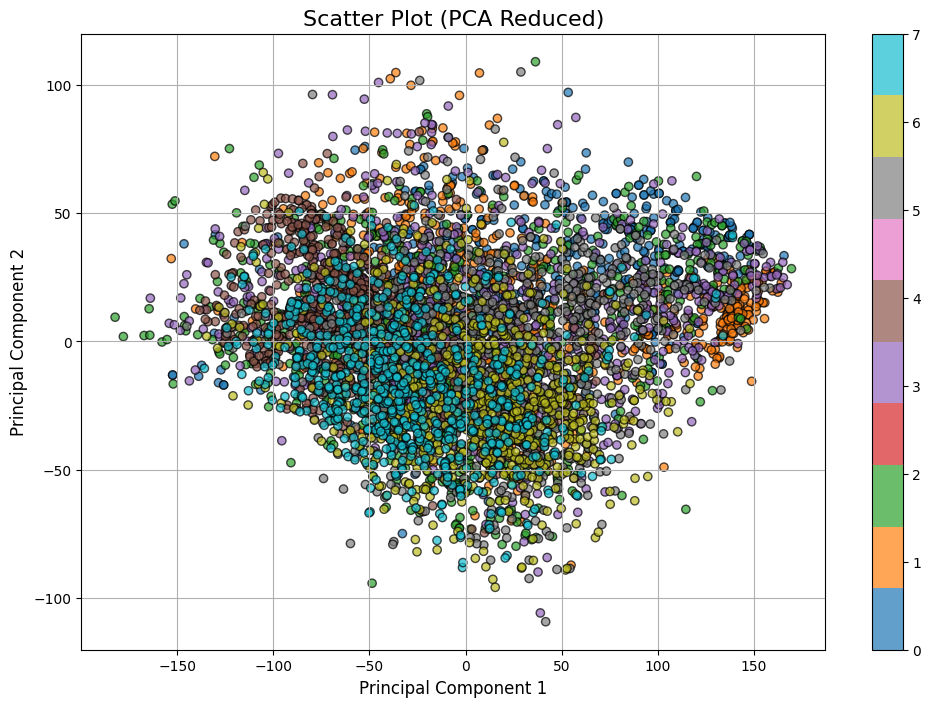

In [4]:
from sklearn.decomposition import PCA

def scatter_plot_pca(images, labels, class_names):
    """
    Visualizes a scatter plot of reduced image data using PCA.
    """
    # Flatten images for PCA
    flattened_images = images.reshape(images.shape[0], -1)
    
    # Reduce dimensionality with PCA
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(flattened_images)

    # Scatter plot
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(
        reduced_data[:, 0], reduced_data[:, 1],
        c=labels, cmap='tab10', alpha=0.7, edgecolor='k'
    )
    plt.colorbar(scatter, ticks=range(len(class_names)))
    plt.title("Scatter Plot (PCA Reduced)", fontsize=16)
    plt.xlabel("Principal Component 1", fontsize=12)
    plt.ylabel("Principal Component 2", fontsize=12)
    plt.grid()
    plt.show()

# Plot PCA-based scatter plot
scatter_plot_pca(images, labels, class_names)


In [5]:
def scatter_plot_dimensions(directory, class_names):
    """
    Visualizes a scatter plot of image dimensions (height vs. width) by class.
    """
    heights = []
    widths = []
    labels = []

    for class_idx, class_name in enumerate(class_names):
        class_dir = directory / class_name
        for img_file in os.listdir(class_dir):
            img_path = class_dir / img_file
            try:
                img = load_img(img_path)  # Load image without resizing
                widths.append(img.size[0])  # Width
                heights.append(img.size[1])  # Height
                labels.append(class_idx)  # Class index
            except Exception as e:
                print(f"Skipping invalid file {img_path}: {e}")

    # Scatter plot
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(
        widths, heights,
        c=labels, cmap='tab10', alpha=0.7, edgecolor='k'
    )
    plt.colorbar(scatter, ticks=range(len(class_names)))
    plt.title("Scatter Plot of Image Dimensions by Class", fontsize=16)
    plt.xlabel("Width (pixels)", fontsize=12)
    plt.ylabel("Height (pixels)", fontsize=12)
    plt.grid()
    plt.show()

# Plot dimension-based scatter plot
scatter_plot_dimensions(dataset_path, class_names)


C:\Users\Shaurya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directory path
dataset_path = "C://Users//Shaurya//Downloads//Vehicles"

# Parameters for image preprocessing
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# Data augmentation and preprocessing for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255,                 # Normalize pixel values
    rotation_range=20,               # Random rotation
    width_shift_range=0.1,           # Horizontal shift
    height_shift_range=0.1,          # Vertical shift
    zoom_range=0.2,                  # Random zoom
    horizontal_flip=True,            # Horizontal flip
    validation_split=0.2             # Split for validation
)

# Preprocessing for validation and testing
val_test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load training data with augmentation
train_data = train_datagen.flow_from_directory(
    dataset_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

# Load validation data
val_data = train_datagen.flow_from_directory(
    dataset_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Load test data (no augmentation, only rescaling)
test_data = val_test_datagen.flow_from_directory(
    dataset_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Keep order for evaluation
)

# Print the class indices
class_names = list(train_data.class_indices.keys())
print(f"Classes: {class_names}")


Found 5110 images belonging to 8 classes.
Found 1277 images belonging to 8 classes.
Found 6387 images belonging to 8 classes.
Classes: ['Auto Rickshaws', 'Bikes', 'Cars', 'Motorcycles', 'Non-vehicles', 'Planes', 'Ships', 'Trains']


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Clear session to avoid conflicts
from tensorflow.keras import backend as K
K.clear_session()

# Build the CNN model
model = Sequential()

# Convolutional layers with dropout for regularization
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))  # 8 classes for classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data,
    verbose=1
)

# Save the trained model
model.save("C://Users//Shaurya//Downloads//vehicle_classifier_model.h5")


C:\Users\Shaurya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Shaurya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 110s 678ms/step - accuracy: 0.1746 - loss: 2.6935 - val_accuracy: 0.5035 - val_loss: 1.5335
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 107s 666ms/step - accuracy: 0.5443 - loss: 1.3536 - val_accuracy: 0.6343 - val_loss: 1.0336
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 107s 671ms/step - accuracy: 0.6524 - loss: 1.0421 - val_accuracy: 0.6868 - val_loss: 0.9270
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 107s 665ms/step - accuracy: 0.7046 - loss: 0.8798 - val_accuracy: 0.6476 - val_loss: 1.0047
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 122s 760ms/step - accuracy: 0.6972 - loss: 0.8647 - val_accuracy: 0.7549 - val_loss: 0.7675
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 113s 704ms/step - accuracy: 0.7251 - loss: 0.7901 - val_accuracy: 0.7604 - val_loss: 0.7435
Epoch 7/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 105s 658ms/step - accuracy: 0.7544 - loss: 0.7464 - val_accuracy: 0.7518 - val_loss: 0.7359
Epoch 8/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 110s 686ms/step - accuracy: 0.7651 -

 10/200 ━━━━━━━━━━━━━━━━━━━━ 32s 173ms/step - accuracy: 0.7290 - loss: 0.7682

C:\Users\Shaurya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


200/200 ━━━━━━━━━━━━━━━━━━━━ 34s 171ms/step - accuracy: 0.8057 - loss: 0.5749
Test Accuracy: 82.14%
160/160 ━━━━━━━━━━━━━━━━━━━━ 52s 328ms/step
200/200 ━━━━━━━━━━━━━━━━━━━━ 34s 172ms/step


<Figure size 1000x800 with 0 Axes>

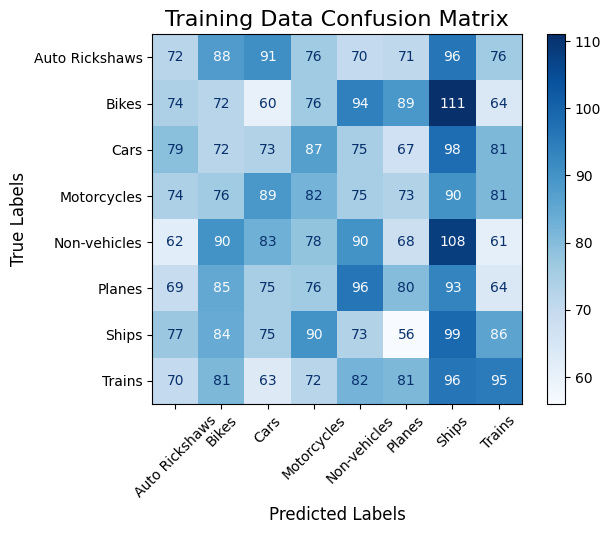

<Figure size 1000x800 with 0 Axes>

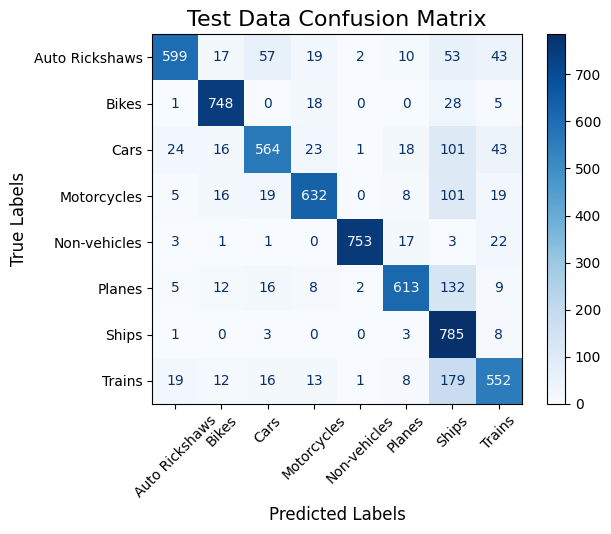


Class-Wise Accuracy:
Auto Rickshaws: 74.88%
Bikes: 93.50%
Cars: 71.39%
Motorcycles: 79.00%
Non-vehicles: 94.12%
Planes: 76.91%
Ships: 98.12%
Trains: 69.00%


In [9]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_data, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predictions for training and test data
train_preds = np.argmax(model.predict(train_data), axis=1)
train_labels = train_data.classes

test_preds = np.argmax(model.predict(test_data), axis=1)
test_labels = test_data.classes

# Confusion matrices
train_conf_matrix = confusion_matrix(train_labels, train_preds)
test_conf_matrix = confusion_matrix(test_labels, test_preds)

# Function to plot confusion matrices
def plot_confusion_matrix(cm, class_names, title):
    plt.figure(figsize=(10, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap='Blues', xticks_rotation=45, colorbar=True)
    plt.title(title, fontsize=16)
    plt.xlabel("Predicted Labels", fontsize=12)
    plt.ylabel("True Labels", fontsize=12)
    plt.grid(False)
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(train_conf_matrix, class_names, "Training Data Confusion Matrix")
plot_confusion_matrix(test_conf_matrix, class_names, "Test Data Confusion Matrix")

# Class-wise accuracy calculation
def calculate_class_accuracy(conf_matrix, class_names):
    class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
    print("\nClass-Wise Accuracy:")
    for i, class_name in enumerate(class_names):
        print(f"{class_name}: {class_accuracy[i] * 100:.2f}%")

# Display class-wise accuracy
calculate_class_accuracy(test_conf_matrix, class_names)

# Plot training history
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy", fontsize=16)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss", fontsize=16)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [6]:
import os
import pathlib
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Dataset path
dataset_path = pathlib.Path(r"C://Users//Shaurya//Downloads//Vehicles")

# Function to load images and labels
def load_images_and_labels(path, image_size=(64, 64)):
    images = []
    labels = []
    class_names = sorted([d.name for d in path.iterdir() if d.is_dir()])
    class_to_index = {class_name: idx for idx, class_name in enumerate(class_names)}

    for class_name in class_names:
        class_dir = path / class_name
        for image_file in class_dir.iterdir():
            try:
                img = Image.open(image_file).convert('RGB')  # Convert to RGB
                img_resized = img.resize(image_size)        # Resize to (64x64)
                images.append(np.array(img_resized) / 255.0)  # Normalize
                labels.append(class_to_index[class_name])
            except Exception as e:
                print(f"Skipping invalid image: {image_file}, Error: {e}")

    return np.array(images), np.array(labels), class_names

# Load data
images, labels, class_names = load_images_and_labels(dataset_path, image_size=(64, 64))

# One-hot encode labels
labels = tf.keras.utils.to_categorical(labels, num_classes=len(class_names))

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training samples: {len(X_train)}, Validation samples: {len(X_val)}, Test samples: {len(X_test)}")


Training samples: 4471, Validation samples: 958, Test samples: 959


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Define the MLP model
mlp_model = Sequential([
    Flatten(input_shape=(64, 64, 3)),           # Flatten the image input
    Dense(1024, activation='relu'),            # First hidden layer
    Dropout(0.4),                              # Dropout for regularization
    Dense(512, activation='relu'),             # Second hidden layer
    Dropout(0.3),
    Dense(256, activation='relu'),             # Third hidden layer
    Dropout(0.2),
    Dense(len(class_names), activation='softmax')  # Output layer
])

# Compile the model
mlp_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = mlp_model.fit(
    X_train, y_train,
    epochs=75,                      # Train for 20 epochs
    validation_data=(X_val, y_val),
    batch_size=64,                  # Use a batch size of 64
    verbose=1
)


Epoch 1/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.1415 - loss: 5.2146 - val_accuracy: 0.2808 - val_loss: 1.9660
Epoch 2/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.2082 - loss: 1.9688 - val_accuracy: 0.3132 - val_loss: 1.7940
Epoch 3/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.2597 - loss: 1.8833 - val_accuracy: 0.3612 - val_loss: 1.7153
Epoch 4/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.2927 - loss: 1.8129 - val_accuracy: 0.4071 - val_loss: 1.6869
Epoch 5/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.2905 - loss: 1.8112 - val_accuracy: 0.4029 - val_loss: 1.7362
Epoch 6/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.3123 - loss: 1.7913 - val_accuracy: 0.3205 - val_loss: 1.7647
Epoch 7/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.2652 - loss: 1.8229 - val_accuracy: 0.4092 - val_loss: 1.6843
Epoch 8/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.3244 - loss: 1.7317 - val_accuracy: 0.4113 - v

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5334 - loss: 1.4638

Test Accuracy: 51.93%
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5932 - loss: 1.2717

Train Accuracy: 58.98%
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Training Data Confusion Matrix:
[[306  14  20  64  59   0   1  79]
 [  0 413   0  28  91   0   1  20]
 [  9   8 170  77  30   2   5 268]
 [ 10  12  36 330  42   2   1 135]
 [  0  39   0   0 469   3   1  31]
 [  0   7   2  14 193 260  26  68]
 [  2   7  19   7 114  14 249 152]
 [  0  18   8  12  83   0   0 440]]

Test Data Confusion Matrix:
[[ 51   6  10  14  19   1   0  34]
 [  0  87   1   9  22   0   0  11]
 [  6   1  32  17  14   3   0  43]
 [  4   7   4  56  11   1   0  35]
 [  0  13   0   1 104   0   0  12]
 [  1   1   0   4  38  44   5  10]
 [  1   1   4   4  22   5  43  32]
 [  0   6   4   4  16   1   3  81]]


<Figure size 1000x800 with 0 Axes>

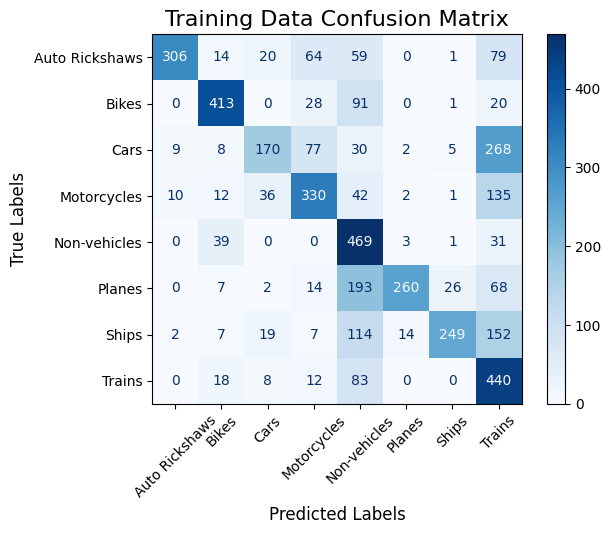

<Figure size 1000x800 with 0 Axes>


Classification Report for Training Data:
                precision    recall  f1-score   support

Auto Rickshaws       0.94      0.56      0.70       543
         Bikes       0.80      0.75      0.77       553
          Cars       0.67      0.30      0.41       569
   Motorcycles       0.62      0.58      0.60       568
  Non-vehicles       0.43      0.86      0.58       543
        Planes       0.93      0.46      0.61       570
         Ships       0.88      0.44      0.59       564
        Trains       0.37      0.78      0.50       561

      accuracy                           0.59      4471
     macro avg       0.70      0.59      0.60      4471
  weighted avg       0.70      0.59      0.59      4471


Classification Report for Test Data:
                precision    recall  f1-score   support

Auto Rickshaws       0.81      0.38      0.52       135
         Bikes       0.71      0.67      0.69       130
          Cars       0.58      0.28      0.37       116
   Motorcycles      

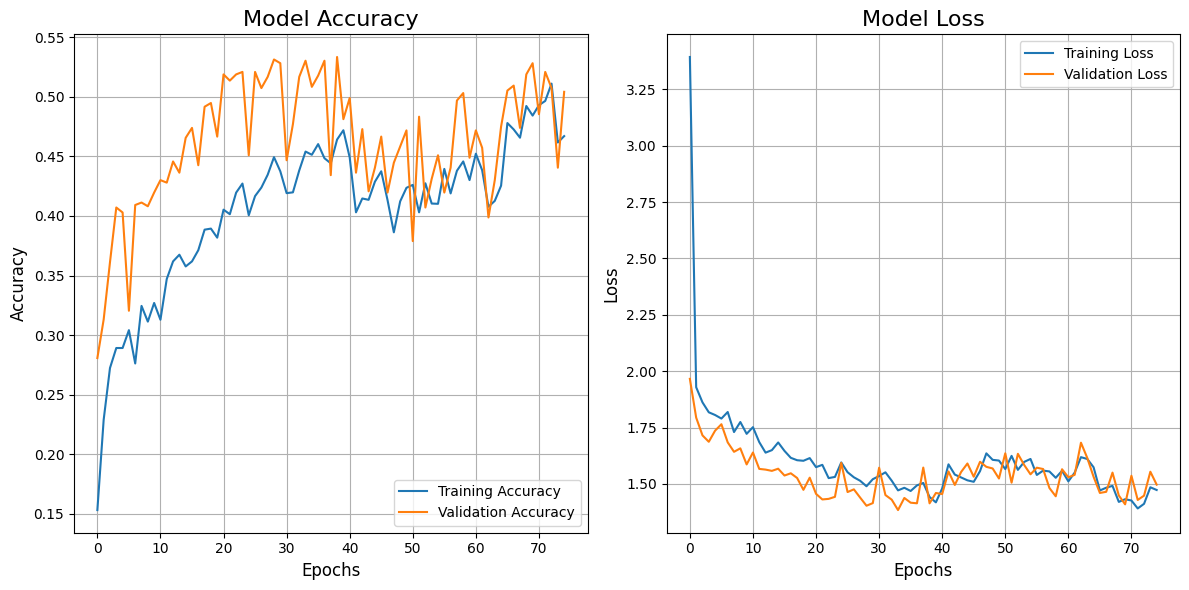

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Evaluate on test data
test_loss, test_accuracy = mlp_model.evaluate(X_test, y_test, verbose=1)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")

# Evaluate on training data
train_loss, train_accuracy = mlp_model.evaluate(X_train, y_train, verbose=1)
print(f"\nTrain Accuracy: {train_accuracy * 100:.2f}%")

# Predict on training data
y_train_pred = np.argmax(mlp_model.predict(X_train), axis=1)
y_train_true = np.argmax(y_train, axis=1)

# Predict on test data
y_test_pred = np.argmax(mlp_model.predict(X_test), axis=1)
y_test_true = np.argmax(y_test, axis=1)

# Confusion Matrix for Training Data
train_conf_matrix = confusion_matrix(y_train_true, y_train_pred)
print("\nTraining Data Confusion Matrix:")
print(train_conf_matrix)

# Confusion Matrix for Test Data
test_conf_matrix = confusion_matrix(y_test_true, y_test_pred)
print("\nTest Data Confusion Matrix:")
print(test_conf_matrix)

# Plot Confusion Matrices
def plot_confusion_matrix(cm, class_names, title):
    plt.figure(figsize=(10, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap='Blues', xticks_rotation=45, colorbar=True)
    plt.title(title, fontsize=16)
    plt.xlabel("Predicted Labels", fontsize=12)
    plt.ylabel("True Labels", fontsize=12)
    plt.grid(False)
    plt.show()

# Plot for Training Data
plot_confusion_matrix(train_conf_matrix, class_names, "Training Data Confusion Matrix")

# Plot for Test Data
plot_confusion_matrix(test_conf_matrix, class_names, "Test Data Confusion Matrix")

# Classification Report for Training Data
print("\nClassification Report for Training Data:")
print(classification_report(y_train_true, y_train_pred, target_names=class_names))

# Classification Report for Test Data
print("\nClassification Report for Test Data:")
print(classification_report(y_test_true, y_test_pred, target_names=class_names))

# Class-wise Accuracy
def calculate_class_accuracy(conf_matrix):
    class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
    return class_accuracy

# Training Data Class-Wise Accuracy
train_class_accuracy = calculate_class_accuracy(train_conf_matrix)
print("\nClass-Wise Accuracy for Training Data:")
for i, class_name in enumerate(class_names):
    print(f"{class_name}: {train_class_accuracy[i] * 100:.2f}%")

# Test Data Class-Wise Accuracy
test_class_accuracy = calculate_class_accuracy(test_conf_matrix)
print("\nClass-Wise Accuracy for Test Data:")
for i, class_name in enumerate(class_names):
    print(f"{class_name}: {test_class_accuracy[i] * 100:.2f}%")


# Plot Accuracy and Loss Curves
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()



Visualizing subclass: Auto Rickshaws


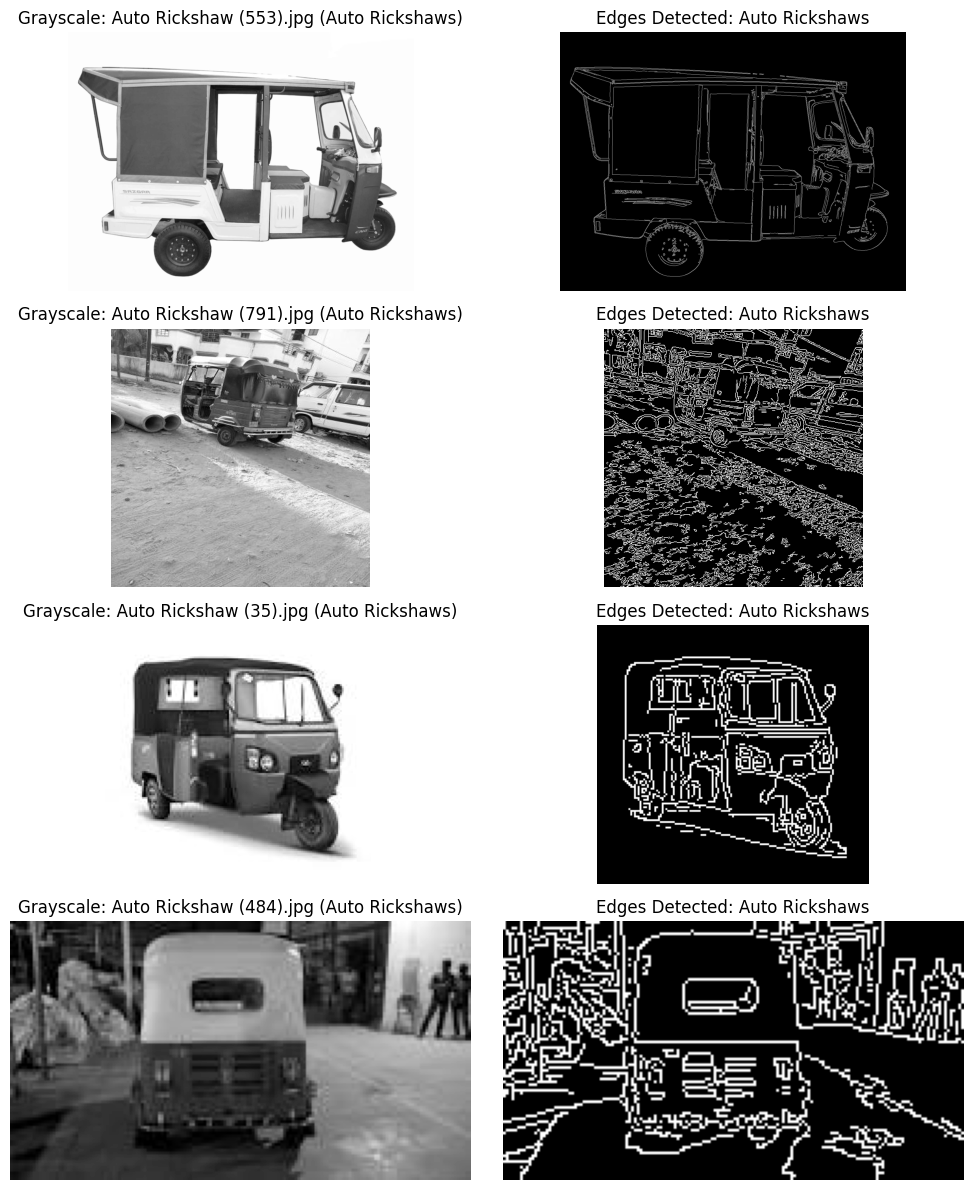

Visualizing subclass: Bikes


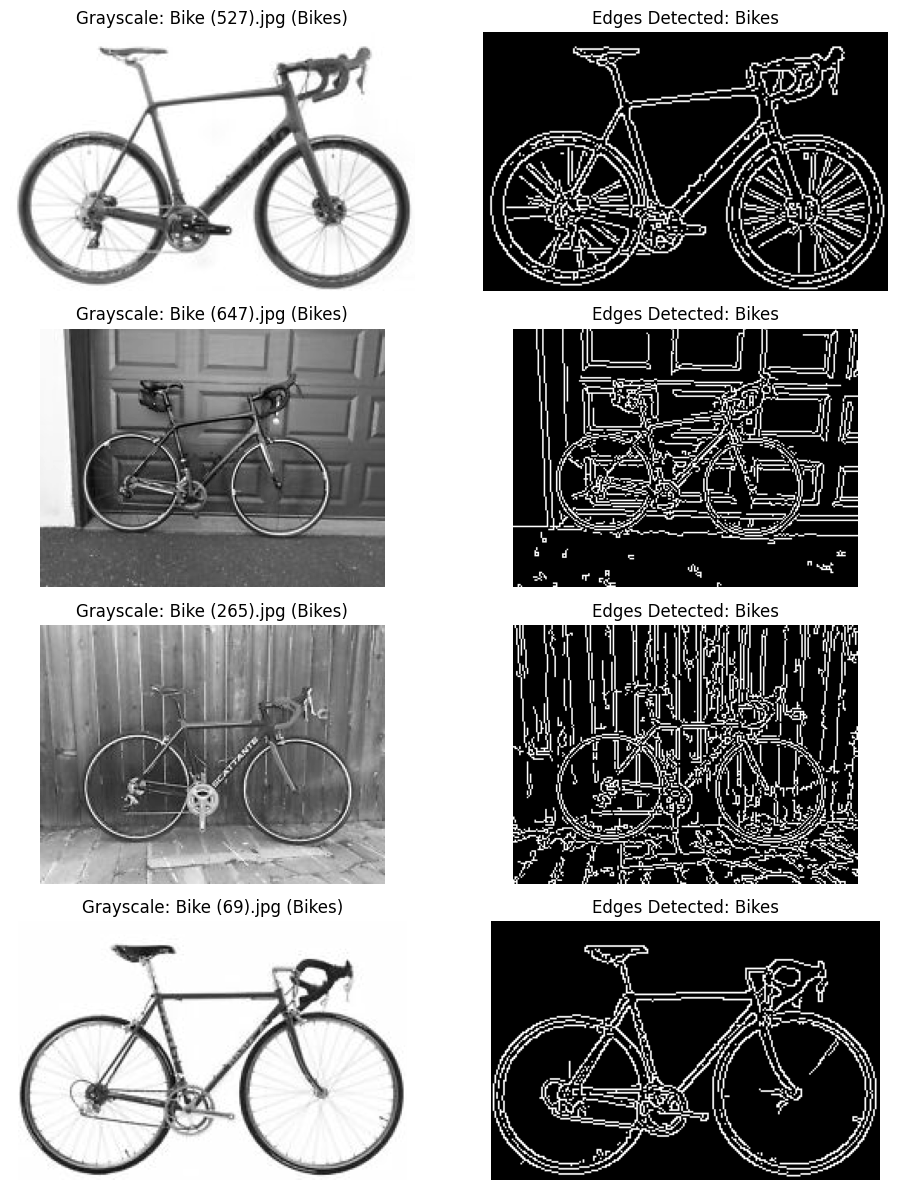

Visualizing subclass: Cars


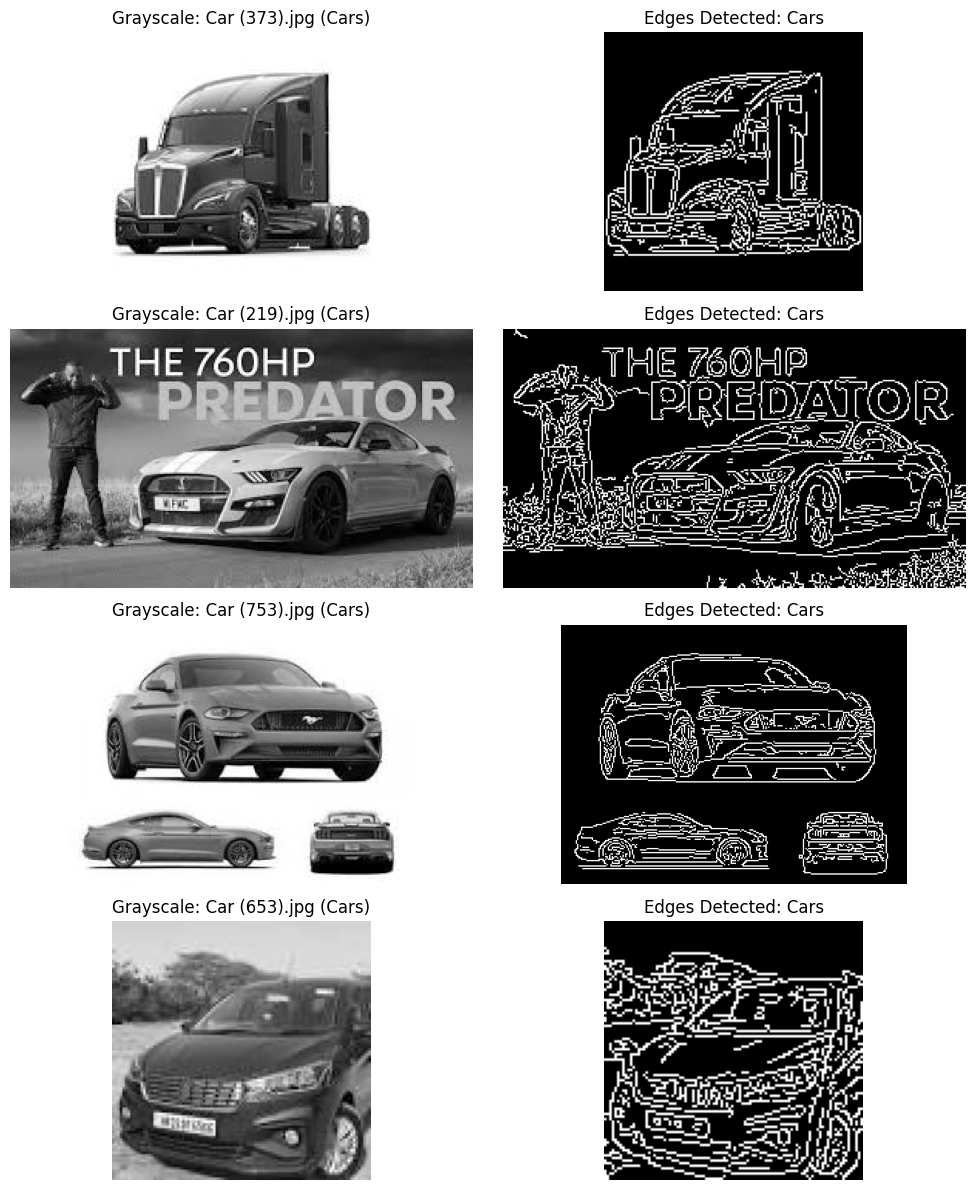

Visualizing subclass: Motorcycles


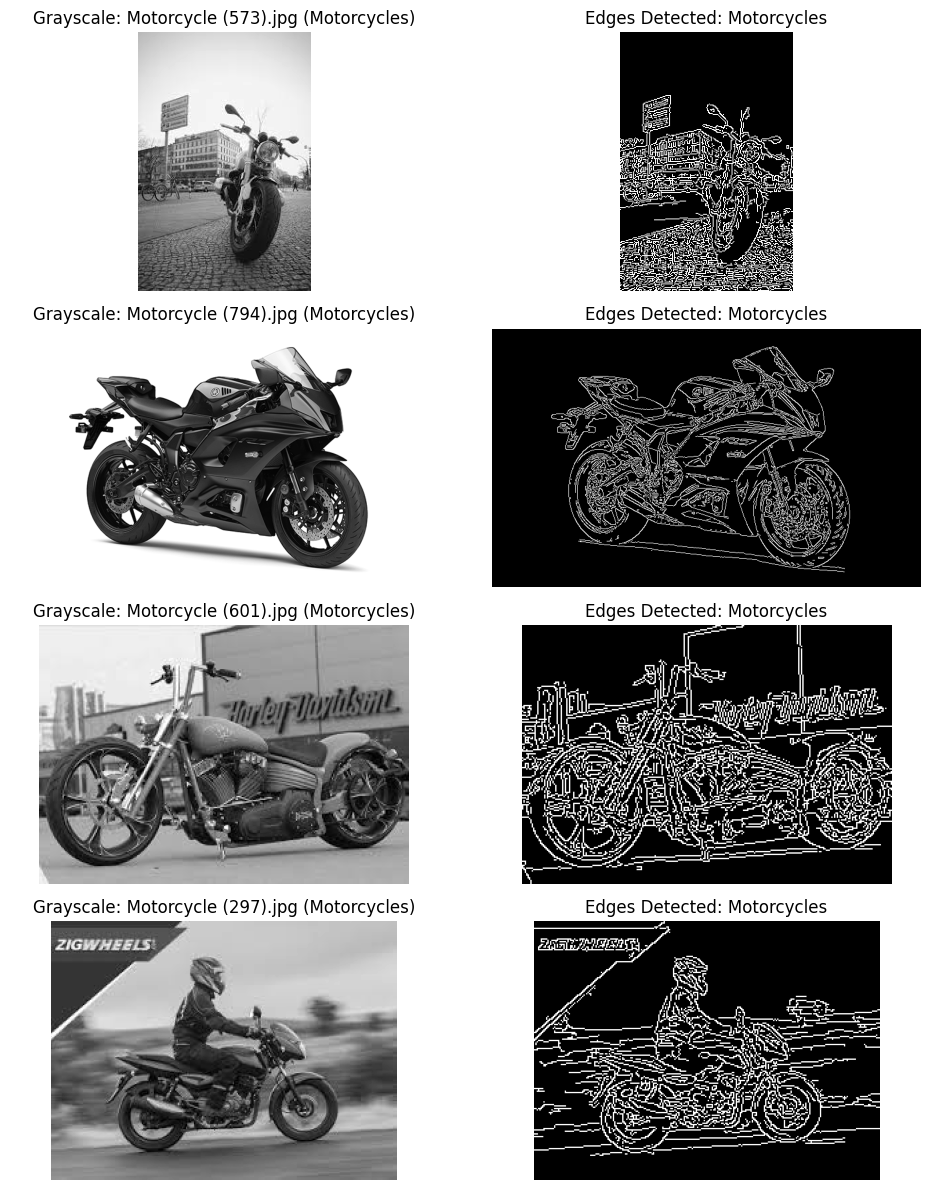

Visualizing subclass: Non-vehicles


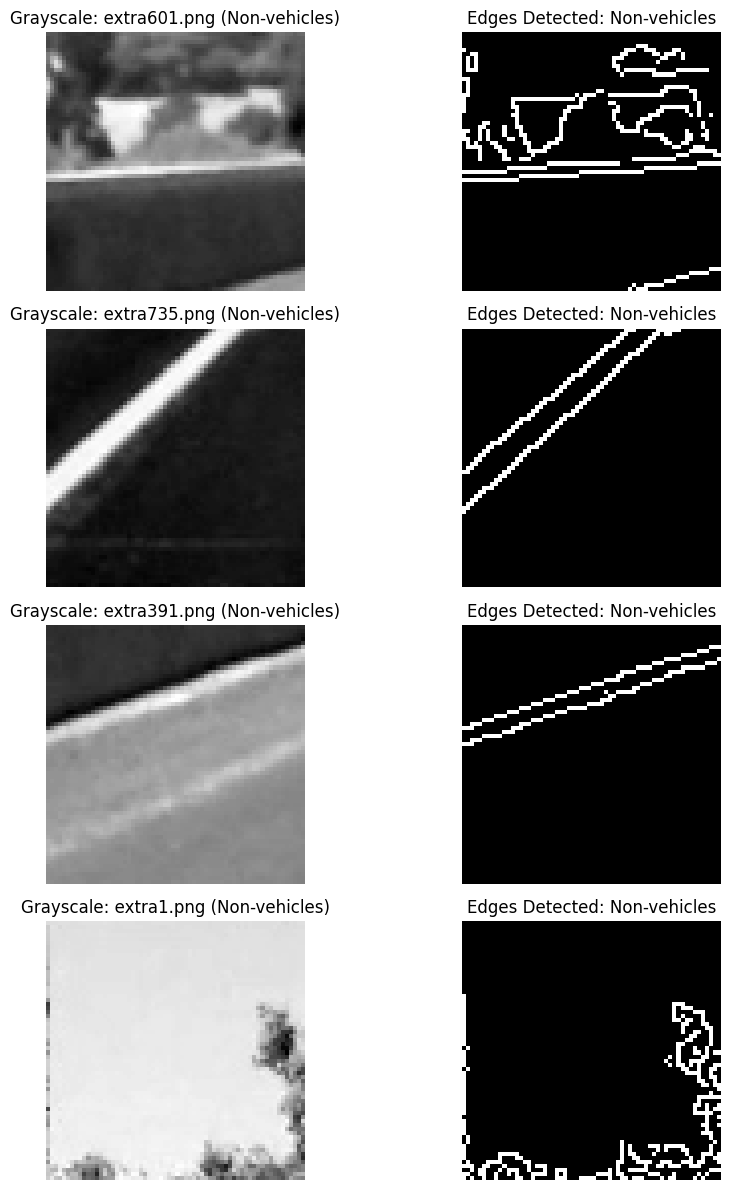

Visualizing subclass: Planes


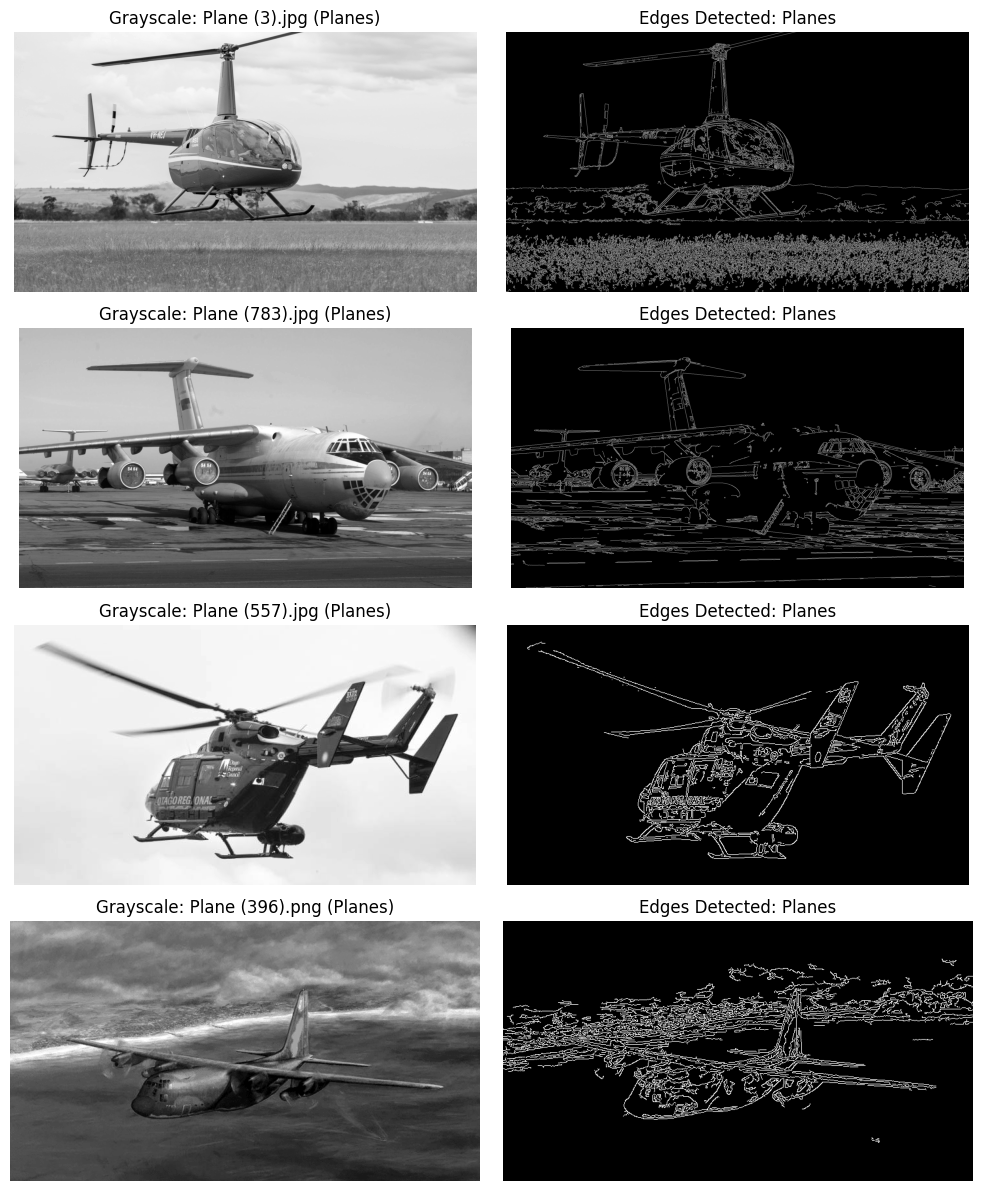

Visualizing subclass: Ships


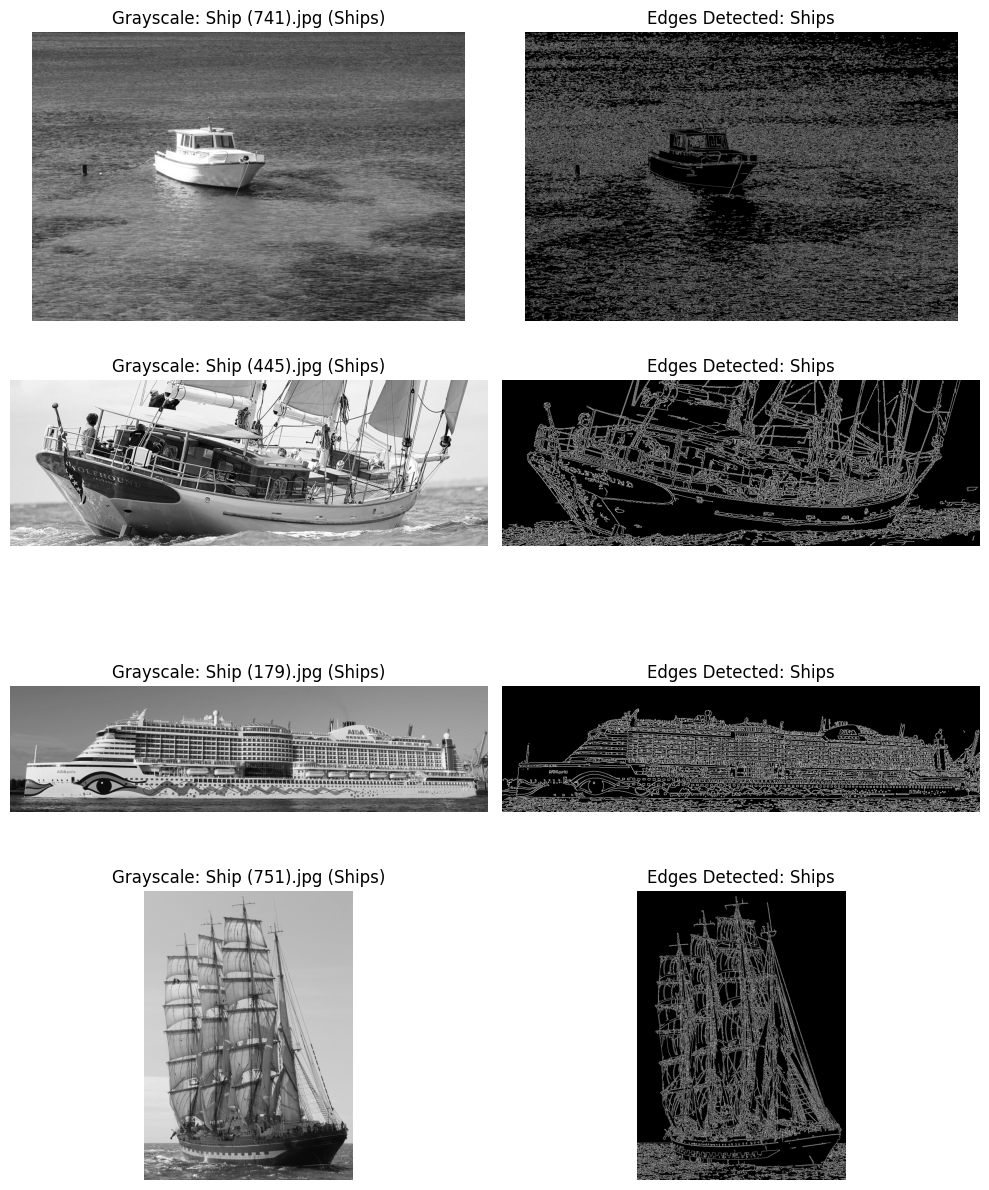

Visualizing subclass: Trains


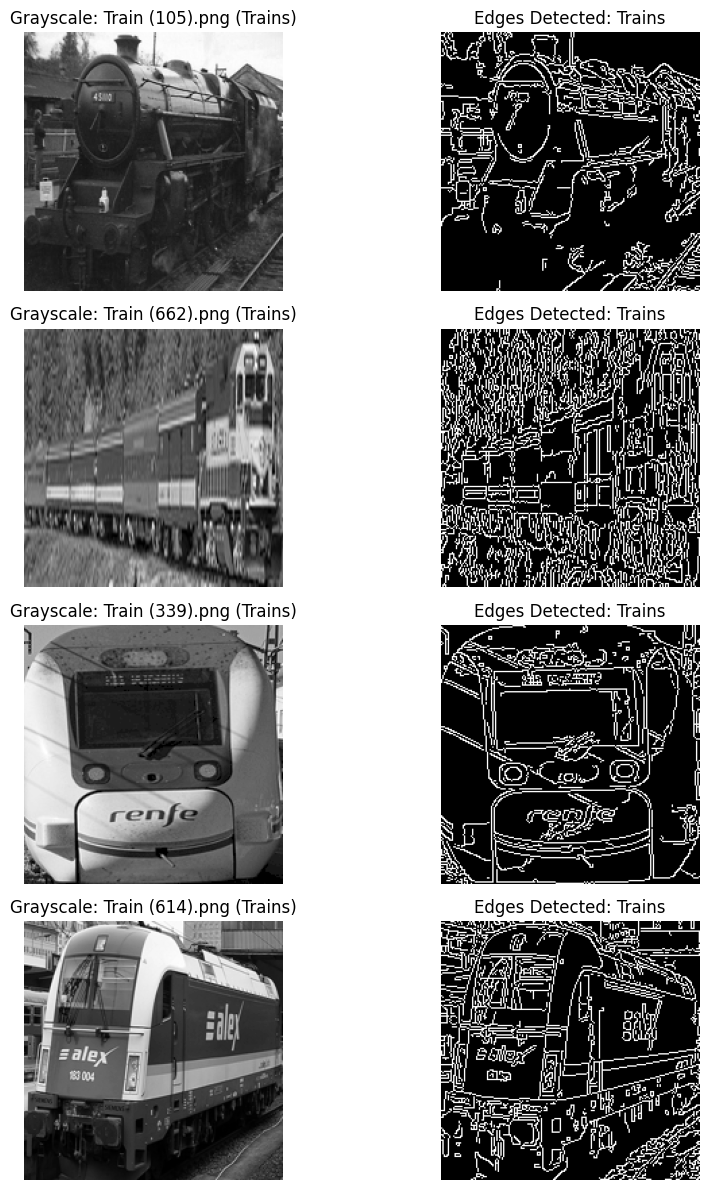

In [13]:
#Canny edges 

import cv2
import os
import random
import matplotlib.pyplot as plt

def display_images_with_edges(image_directory, title_prefix, num_images=4, canny_thresholds=(50, 150)):
    """
    Display grayscale and Canny edge-detected images side-by-side.
    
    Args:
        image_directory (str): Path to the image folder.
        title_prefix (str): Prefix for image titles (e.g., 'Cars', 'Non-Vehicles').
        num_images (int): Number of random images to display.
        canny_thresholds (tuple): Thresholds for Canny edge detection (min, max).
    """
    # Get a list of image file names
    all_images = [os.path.join(image_directory, img) for img in os.listdir(image_directory)
                  if img.endswith(('.png', '.jpg', '.jpeg'))]
    
    # If no images found, skip processing
    if not all_images:
        print(f"No images found in {image_directory}. Skipping...")
        return
    
    # Randomly select images
    selected_images = random.sample(all_images, min(num_images, len(all_images)))
    
    # Process and display the images
    plt.figure(figsize=(10, 12))
    for i, img_path in enumerate(selected_images):
        try:
            # Load the image in grayscale
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            
            # Apply Canny edge detection
            edges = cv2.Canny(image, canny_thresholds[0], canny_thresholds[1])
            
            # Display the grayscale image
            ax1 = plt.subplot(len(selected_images), 2, 2*i + 1)
            ax1.imshow(image, cmap='gray')
            ax1.set_title(f'Grayscale: {os.path.basename(img_path)} ({title_prefix})')
            ax1.axis('off')
            
            # Display the edge-detected image
            ax2 = plt.subplot(len(selected_images), 2, 2*i + 2)
            ax2.imshow(edges, cmap='gray')
            ax2.set_title(f'Edges Detected: {title_prefix}')
            ax2.axis('off')
        except Exception as e:
            print(f"Error processing {img_path}: {e}")
    
    plt.tight_layout()
    plt.show()


def display_images_for_all_subclasses(main_directory, num_images=4, canny_thresholds=(50, 150)):
    """
    Display grayscale and edge-detected images for all subclasses within a main directory.
    
    Args:
        main_directory (str): Path to the main directory containing subclasses.
        num_images (int): Number of images to visualize per subclass.
        canny_thresholds (tuple): Thresholds for Canny edge detection.
    """
    # Iterate through each subclass directory
    for subclass in os.listdir(main_directory):
        subclass_path = os.path.join(main_directory, subclass)
        
        # Skip if not a directory
        if not os.path.isdir(subclass_path):
            continue
        
        print(f"Visualizing subclass: {subclass}")
        display_images_with_edges(subclass_path, title_prefix=subclass, num_images=num_images, canny_thresholds=canny_thresholds)


# Dataset path
main_directory = r"C://Users//Shaurya//Downloads//Vehicles"  # Update this to your dataset path

# Visualize grayscale and edges for all subclasses under the dataset
display_images_for_all_subclasses(main_directory, num_images=4, canny_thresholds=(50, 150))


Processing subclass: Auto Rickshaws


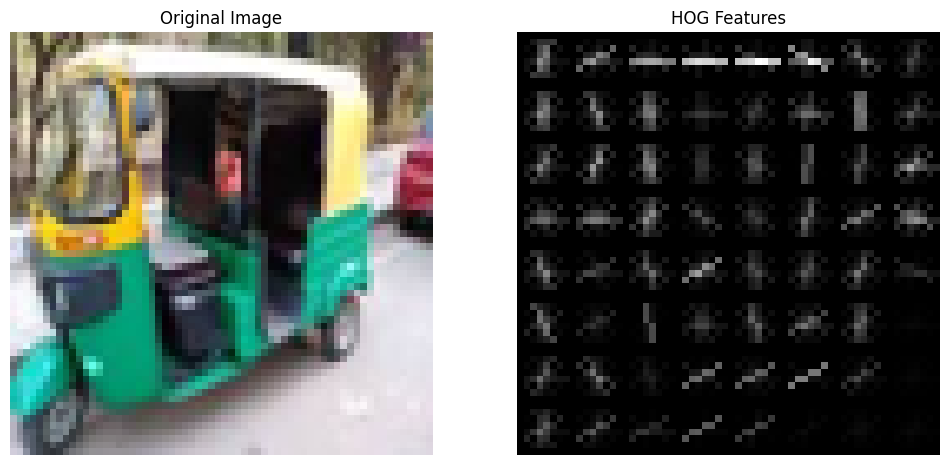

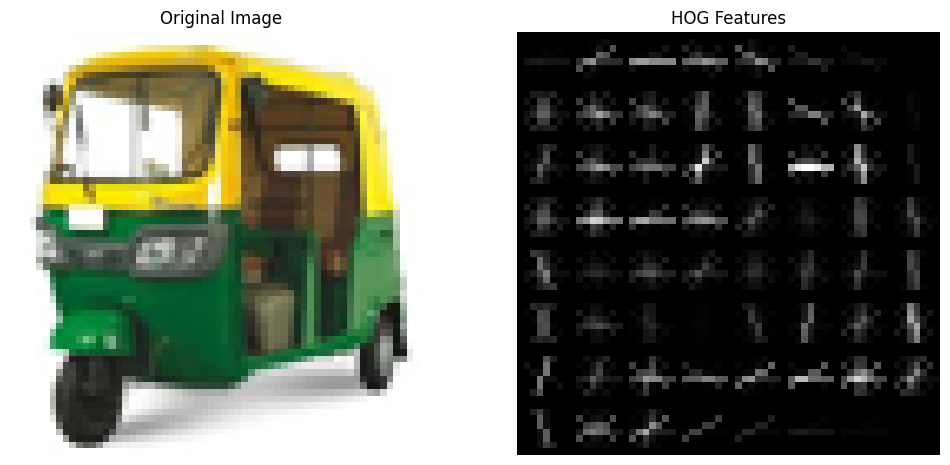

Processing subclass: Bikes


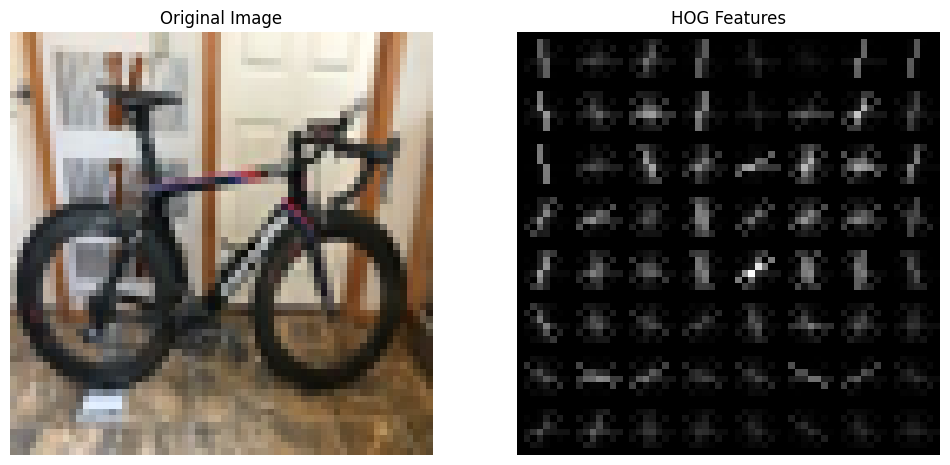

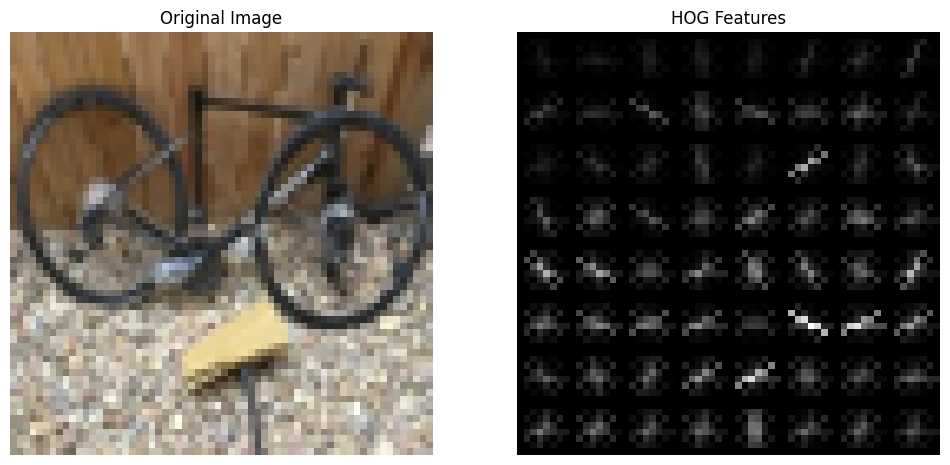

Processing subclass: Cars


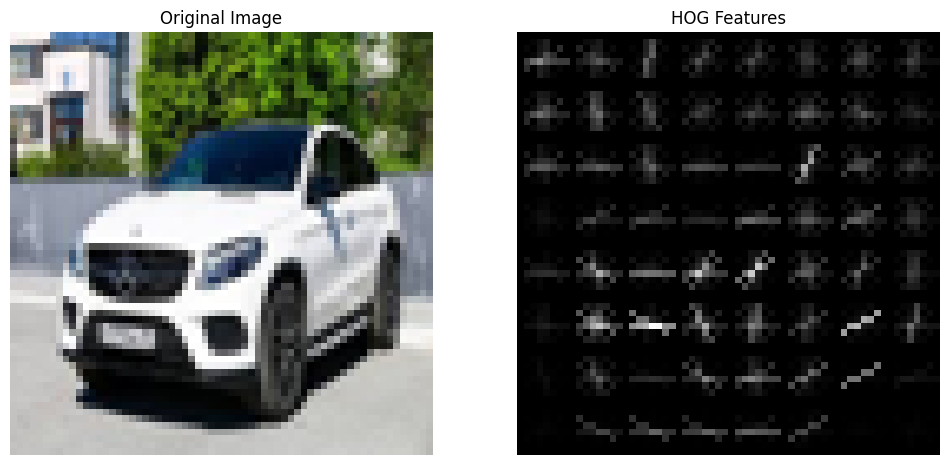

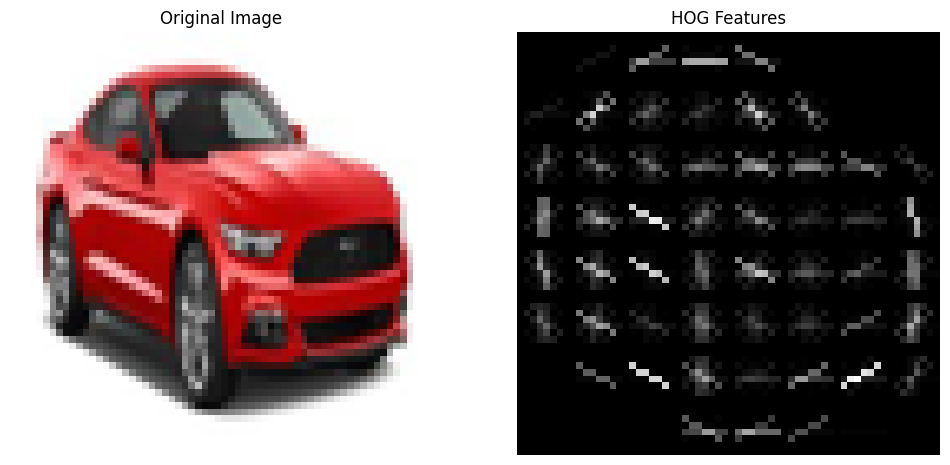

Processing subclass: Motorcycles


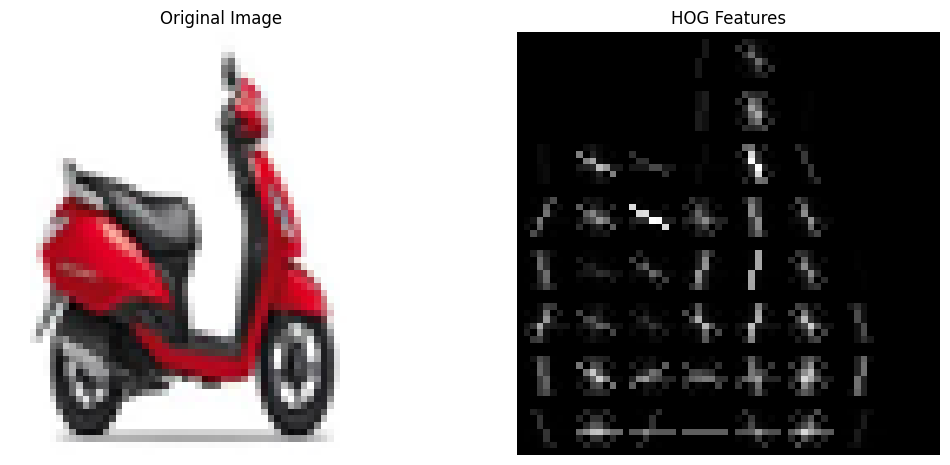

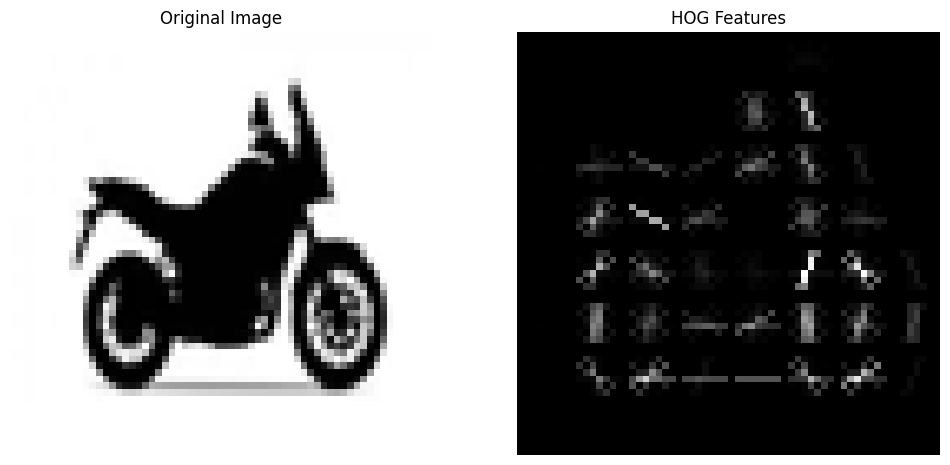

Processing subclass: Non-vehicles


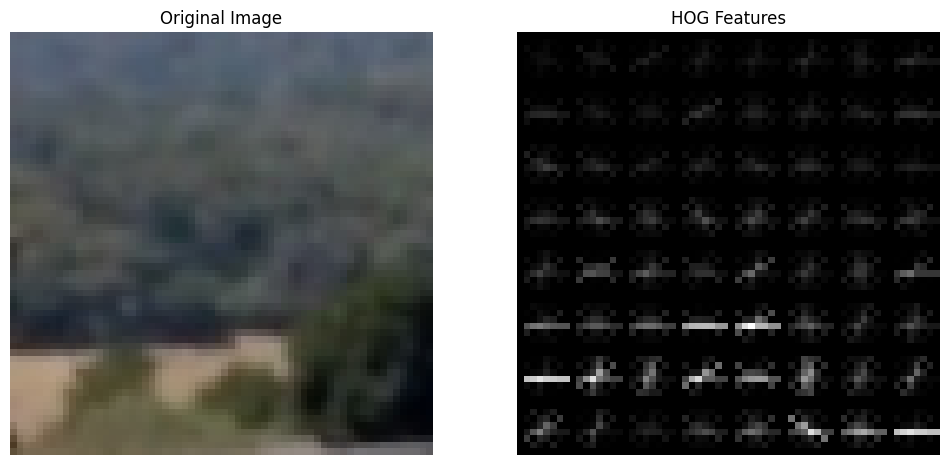

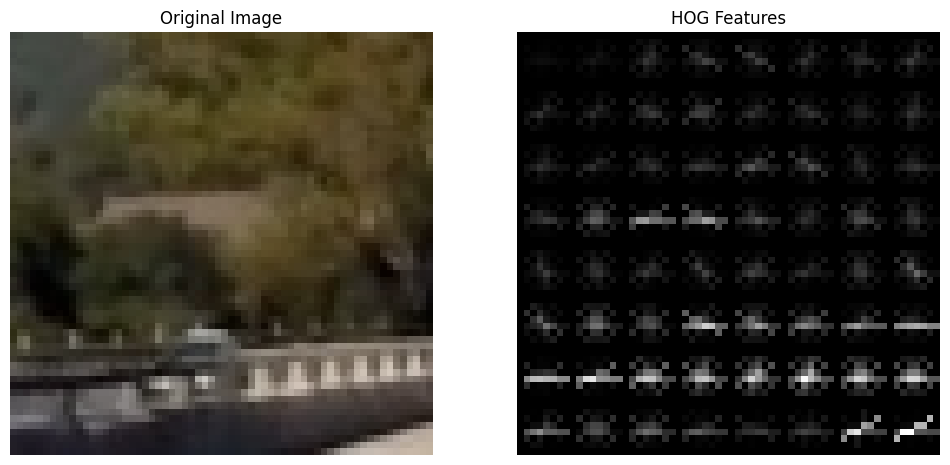

Processing subclass: Planes


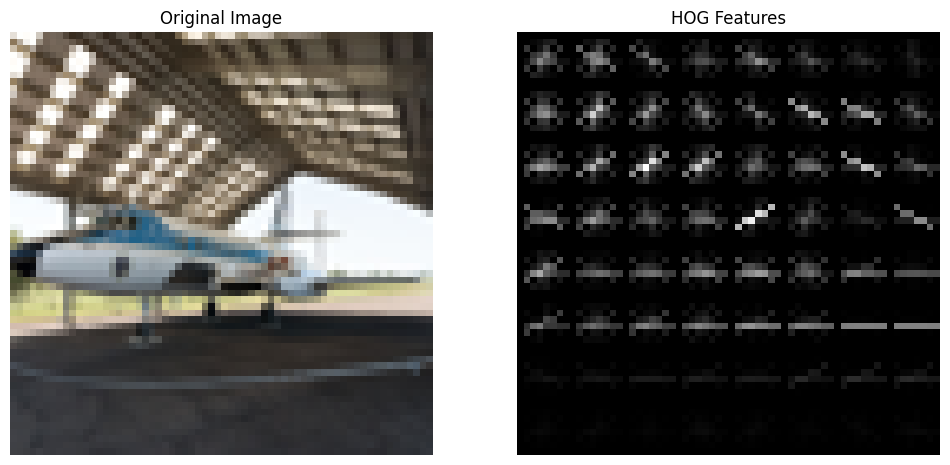

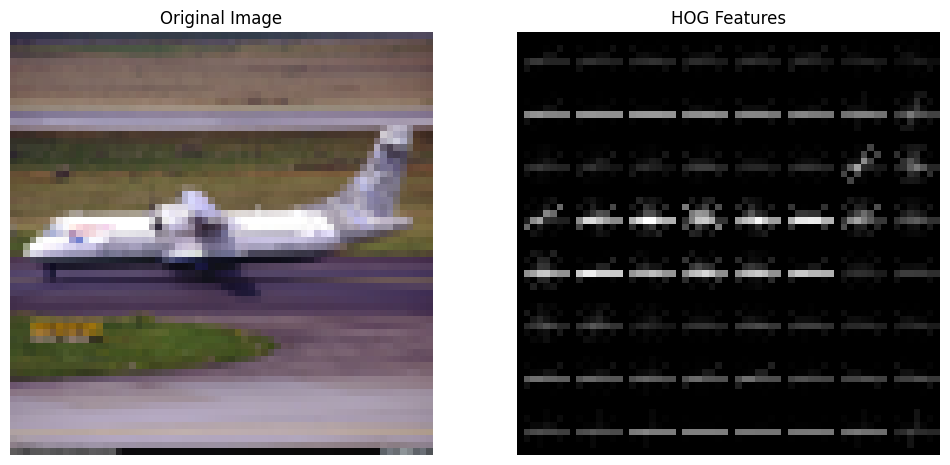

Processing subclass: Ships


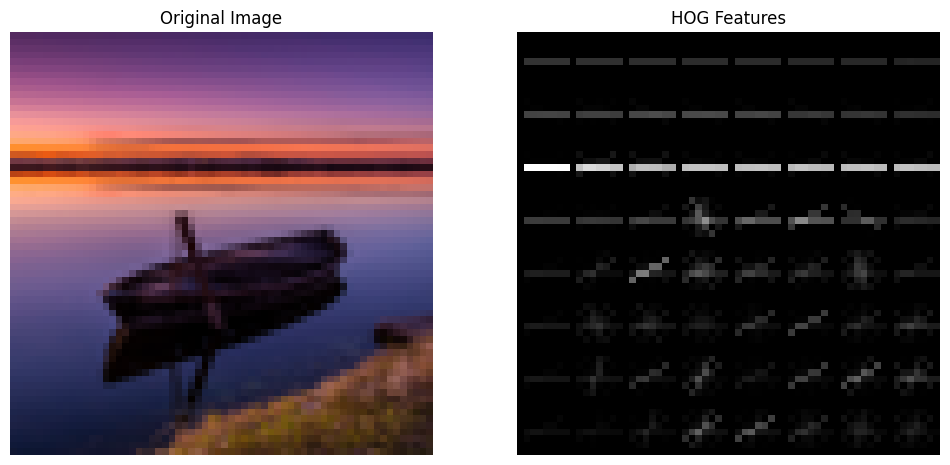

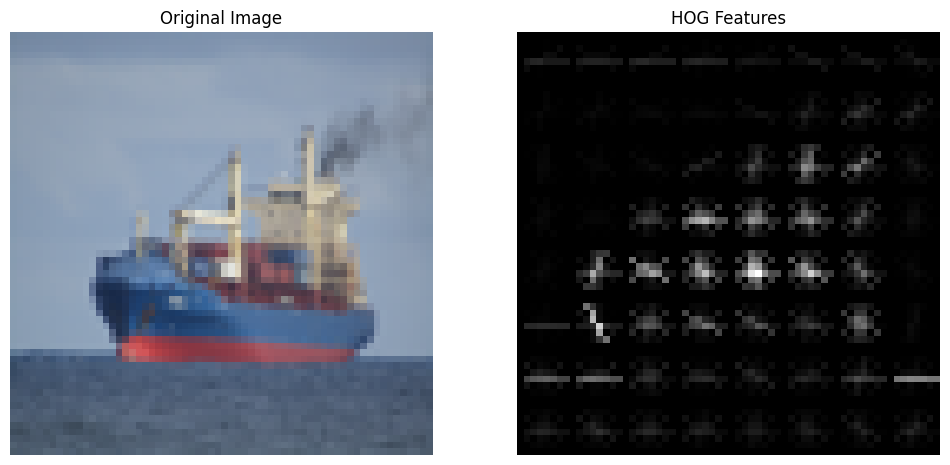

Processing subclass: Trains


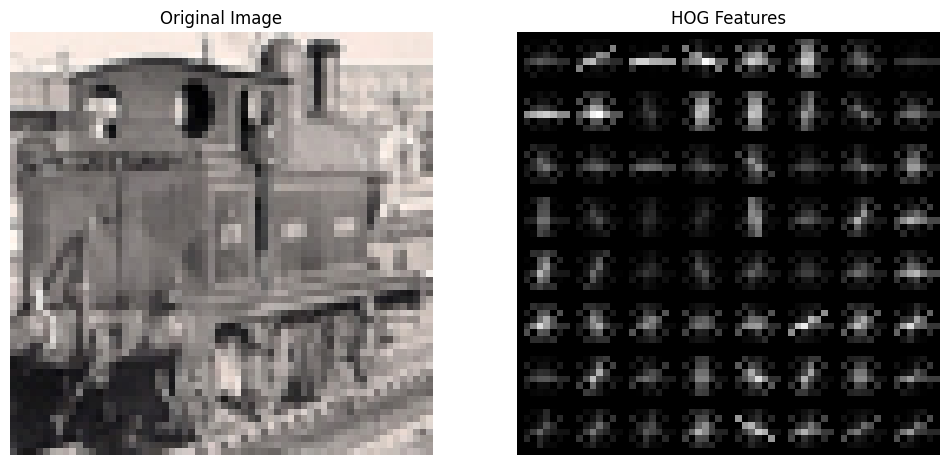

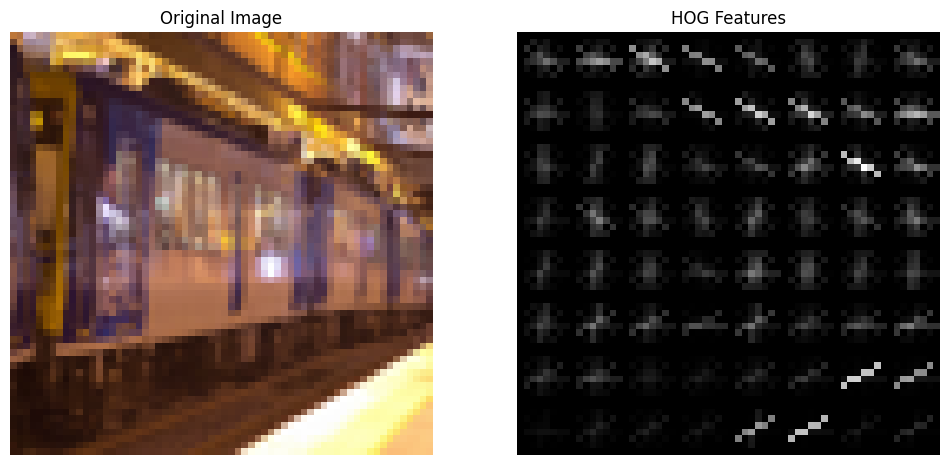

Feature shape: (6304, 1764), Labels shape: (6304,)
Classes: ['Auto Rickshaws', 'Bikes', 'Cars', 'Motorcycles', 'Non-vehicles', 'Planes', 'Ships', 'Trains']


In [16]:
#HOG

from skimage.feature import hog
from skimage import color
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
import random

def extract_hog_features(img_path, resize_to=(64, 64), pixels_per_cell=(8, 8), cells_per_block=(2, 2)):
    """
    Extract HOG features from an image.

    Args:
        img_path (str): Path to the image file.
        resize_to (tuple): Size to which the image will be resized.
        pixels_per_cell (tuple): HOG pixels per cell.
        cells_per_block (tuple): HOG cells per block.

    Returns:
        hog_features (np.array): Extracted HOG features.
        hog_image (np.array): Visual representation of HOG features.
    """
    # Open image, convert to grayscale, and resize
    img = Image.open(img_path).convert('L').resize(resize_to)
    img_array = np.array(img)

    # Extract HOG features
    hog_features, hog_image = hog(
        img_array,
        pixels_per_cell=pixels_per_cell,
        cells_per_block=cells_per_block,
        visualize=True,
        block_norm='L2-Hys'
    )

    return hog_features, hog_image

def visualize_hog(img_path):
    """
    Visualize HOG features for a single image.

    Args:
        img_path (str): Path to the image file.
    """
    hog_features, hog_image = extract_hog_features(img_path)

    # Display original image and HOG features
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

    # Original image
    img = Image.open(img_path).convert('RGB').resize((64, 64))
    ax1.imshow(img)
    ax1.set_title('Original Image')
    ax1.axis('off')

    # HOG image
    ax2.imshow(hog_image, cmap='gray')
    ax2.set_title('HOG Features')
    ax2.axis('off')

    plt.show()

def process_hog_for_all_subclasses(main_directory, num_images=4):
    """
    Process and visualize HOG features for images in all subclasses.

    Args:
        main_directory (str): Path to the main directory containing subclasses.
        num_images (int): Number of images to visualize per subclass.
    """
    for subclass in os.listdir(main_directory):
        subclass_path = os.path.join(main_directory, subclass)

        # Skip if not a directory
        if not os.path.isdir(subclass_path):
            continue
        
        print(f"Processing subclass: {subclass}")
        
        # Get random images from the subclass
        all_images = [os.path.join(subclass_path, img) for img in os.listdir(subclass_path) 
                      if img.endswith(('.png', '.jpg', '.jpeg'))]
        selected_images = random.sample(all_images, min(num_images, len(all_images)))

        for img_path in selected_images:
            visualize_hog(img_path)

def prepare_hog_features(main_directory, resize_to=(64, 64), pixels_per_cell=(8, 8), cells_per_block=(2, 2)):
    """
    Extract HOG features and labels from the dataset.

    Args:
        main_directory (str): Path to the main directory containing subclasses.
        resize_to (tuple): Size to which images will be resized.
        pixels_per_cell (tuple): HOG pixels per cell.
        cells_per_block (tuple): HOG cells per block.

    Returns:
        X (np.array): Array of HOG features.
        y (np.array): Array of labels.
        class_names (list): List of class names.
    """
    X = []
    y = []
    class_names = []
    
    for label, subclass in enumerate(os.listdir(main_directory)):
        subclass_path = os.path.join(main_directory, subclass)
        
        if not os.path.isdir(subclass_path):
            continue
        
        class_names.append(subclass)
        for img_name in os.listdir(subclass_path):
            img_path = os.path.join(subclass_path, img_name)
            if img_path.endswith(('.png', '.jpg', '.jpeg')):
                try:
                    hog_features, _ = extract_hog_features(
                        img_path, resize_to=resize_to, 
                        pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block
                    )
                    X.append(hog_features)
                    y.append(label)
                except Exception as e:
                    print(f"Error processing {img_path}: {e}")
    
    return np.array(X), np.array(y), class_names


# Paths to dataset
main_directory = r"C://Users//Shaurya//Downloads//Vehicles"

# Example usage: Visualize HOG features for all subclasses
process_hog_for_all_subclasses(main_directory, num_images=2)

# Prepare HOG features and labels
X, y, class_names = prepare_hog_features(main_directory)
print(f"Feature shape: {X.shape}, Labels shape: {y.shape}")
print(f"Classes: {class_names}")


In [6]:
import os
import numpy as np
from skimage.feature import hog
from PIL import Image, ImageEnhance, ImageOps
import random

def extract_hog_features(img):
    """
    Extracts HOG features from an image array.
    """
    hog_features, hog_image = hog(img, pixels_per_cell=(8, 8),
                                  cells_per_block=(2, 2),
                                  visualize=True,
                                  block_norm='L2-Hys')
    return hog_features

def augment_image(img_path):
    """
    Performs basic image augmentations: rotation, brightness adjustment, and horizontal flip.
    """
    img = Image.open(img_path).convert('RGB')  # Ensure image is in RGB format

    # Rotate randomly between -10 and 10 degrees
    angle = random.uniform(-10, 10)
    img = img.rotate(angle, resample=Image.BICUBIC, fillcolor=(0, 0, 0))

    # Adjust brightness randomly between 0.8x and 1.2x
    brightness_enhancer = ImageEnhance.Brightness(img)
    brightness_factor = random.uniform(0.8, 1.2)
    img = brightness_enhancer.enhance(brightness_factor)

    # Random horizontal flip
    if random.random() > 0.5:
        img = ImageOps.mirror(img)

    return img

def prepare_hog_features_optimized(main_directory, augment=False, save_path=None):
    """
    Optimized HOG feature extraction with optional augmentation.
    Args:
        main_directory (str): Path to dataset.
        augment (bool): Whether to augment images.
        save_path (str): Path to save precomputed features (optional).
    Returns:
        X (ndarray): HOG features.
        y (ndarray): Labels.
        class_names (list): Class names.
    """
    X, y = [], []
    class_names = []

    for label, subclass in enumerate(os.listdir(main_directory)):
        subclass_path = os.path.join(main_directory, subclass)
        if not os.path.isdir(subclass_path):
            continue

        class_names.append(subclass)
        print(f"Processing {subclass}...")

        for img_name in os.listdir(subclass_path):
            img_path = os.path.join(subclass_path, img_name)
            if img_path.endswith(('.png', '.jpg', '.jpeg')):
                try:
                    # Load and resize the image
                    img = Image.open(img_path).convert('L').resize((64, 64))
                    img_array = np.array(img)

                    # Extract HOG features
                    X.append(extract_hog_features(img_array))
                    y.append(label)

                    # Optional augmentation
                    if augment:
                        augmented_img = augment_image(img_path)
                        augmented_img_gray = np.array(augmented_img.convert('L').resize((64, 64)))
                        X.append(extract_hog_features(augmented_img_gray))
                        y.append(label)
                except Exception as e:
                    print(f"Error processing {img_path}: {e}")

    # Save precomputed features if save_path is provided
    if save_path:
        np.savez(save_path, features=np.array(X), labels=np.array(y))
        print(f"Features saved to {save_path}")

    return np.array(X), np.array(y), class_names

# Example usage
main_directory = r"C://Users//Shaurya//Downloads//Vehicles"
save_path = r"C://Users//Shaurya//Downloads//hog_features.npz"

# Extract and save features
X, y, class_names = prepare_hog_features_optimized(main_directory, augment=True, save_path=save_path)

print(f"Extracted features shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"Class names: {class_names}")


Processing Auto Rickshaws...
Processing Bikes...
Processing Cars...
Processing Motorcycles...
Processing Non-vehicles...
Processing Planes...
Processing Ships...
Processing Trains...
Features saved to C://Users//Shaurya//Downloads//hog_features.npz
Extracted features shape: (12608, 1764)
Labels shape: (12608,)
Class names: ['Auto Rickshaws', 'Bikes', 'Cars', 'Motorcycles', 'Non-vehicles', 'Planes', 'Ships', 'Trains']
